# **Preparação e processamento dos dados**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/refs/heads/main/Dados/bicicletas.csv')

df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df.shape

(17429, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [ ]:
#Tratando os dados nulos(Nan)substituindo o vazio pela média dos dados mais próximos

df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [ ]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [ ]:
duplicatas = df.duplicated(keep=False)
linhas_duplicadas = df[duplicatas]
linhas_duplicadas

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
5360,2015-08-15 23:00:00,759,17.0,17.0,59.0,6.0,Céu limpo,Não,Sim,Verão
8174,2015-12-12 11:00:00,1100,12.0,12.0,82.0,20.0,Chuva leve,Não,Sim,Inverno
8175,2015-12-12 12:00:00,1308,13.0,13.0,77.0,26.0,Chuva leve,Não,Sim,Inverno
8528,2015-12-27 05:00:00,57,15.0,15.0,72.0,31.0,Parcialmente nublado,Não,Sim,Inverno
9428,2016-02-02 17:00:00,2846,8.0,4.5,59.5,23.0,Parcialmente nublado,Não,Não,Inverno


In [ ]:
#Ordenando linhas duplicadas pela coluna data_hora
linhas_duplicadas.sort_values(by='data_hora')


,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [ ]:
#Apagando as linhas duplicadas e verificando a quantidade de linhas depois
df_limpo = df.drop_duplicates()
df_limpo.shape

(17414, 10)

# **Análise exploratória dos dados**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Analisando a distribuição da contagens dos alugueis para cada coluna relativa a condições climáticas

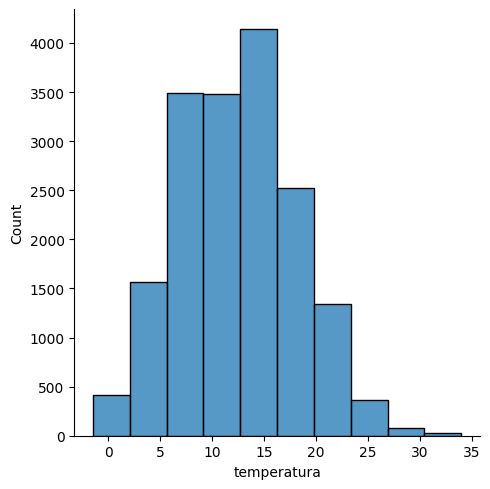

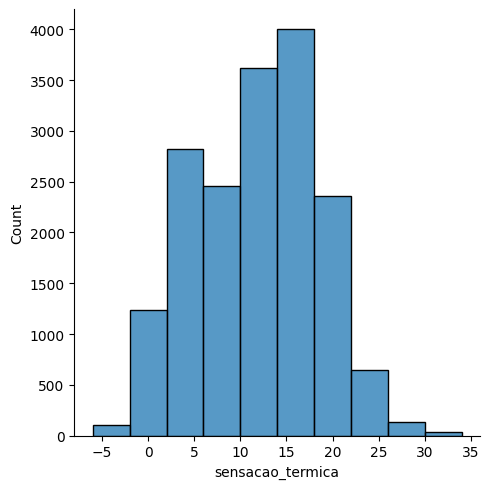

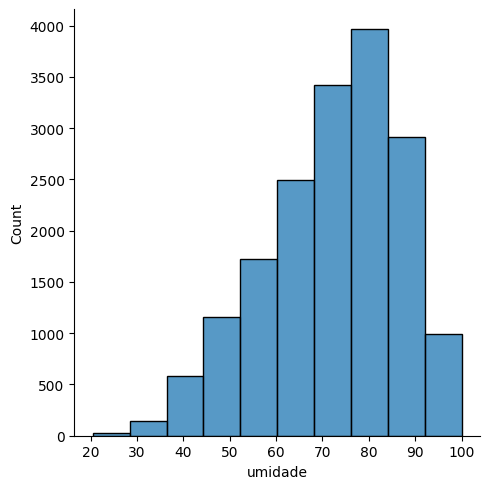

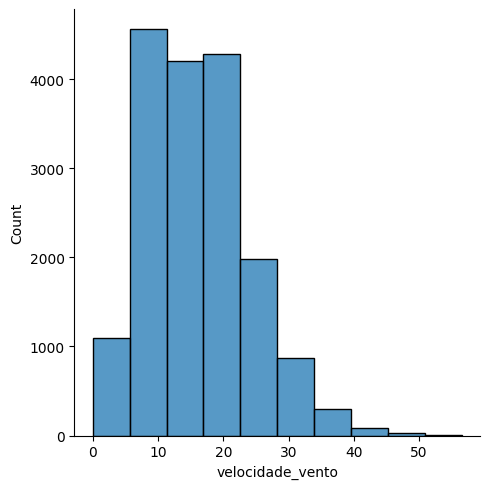

In [ ]:
sns.displot(df_limpo, x= 'temperatura', bins= 10)
sns.displot(df_limpo, x= 'sensacao_termica', bins= 10)
sns.displot(df_limpo, x= 'umidade', bins= 10)
sns.displot(df_limpo, x= 'velocidade_vento', bins= 10)
plt.show()

Analisando as correlações entre clima e alugueis através de gráfico de dispersões

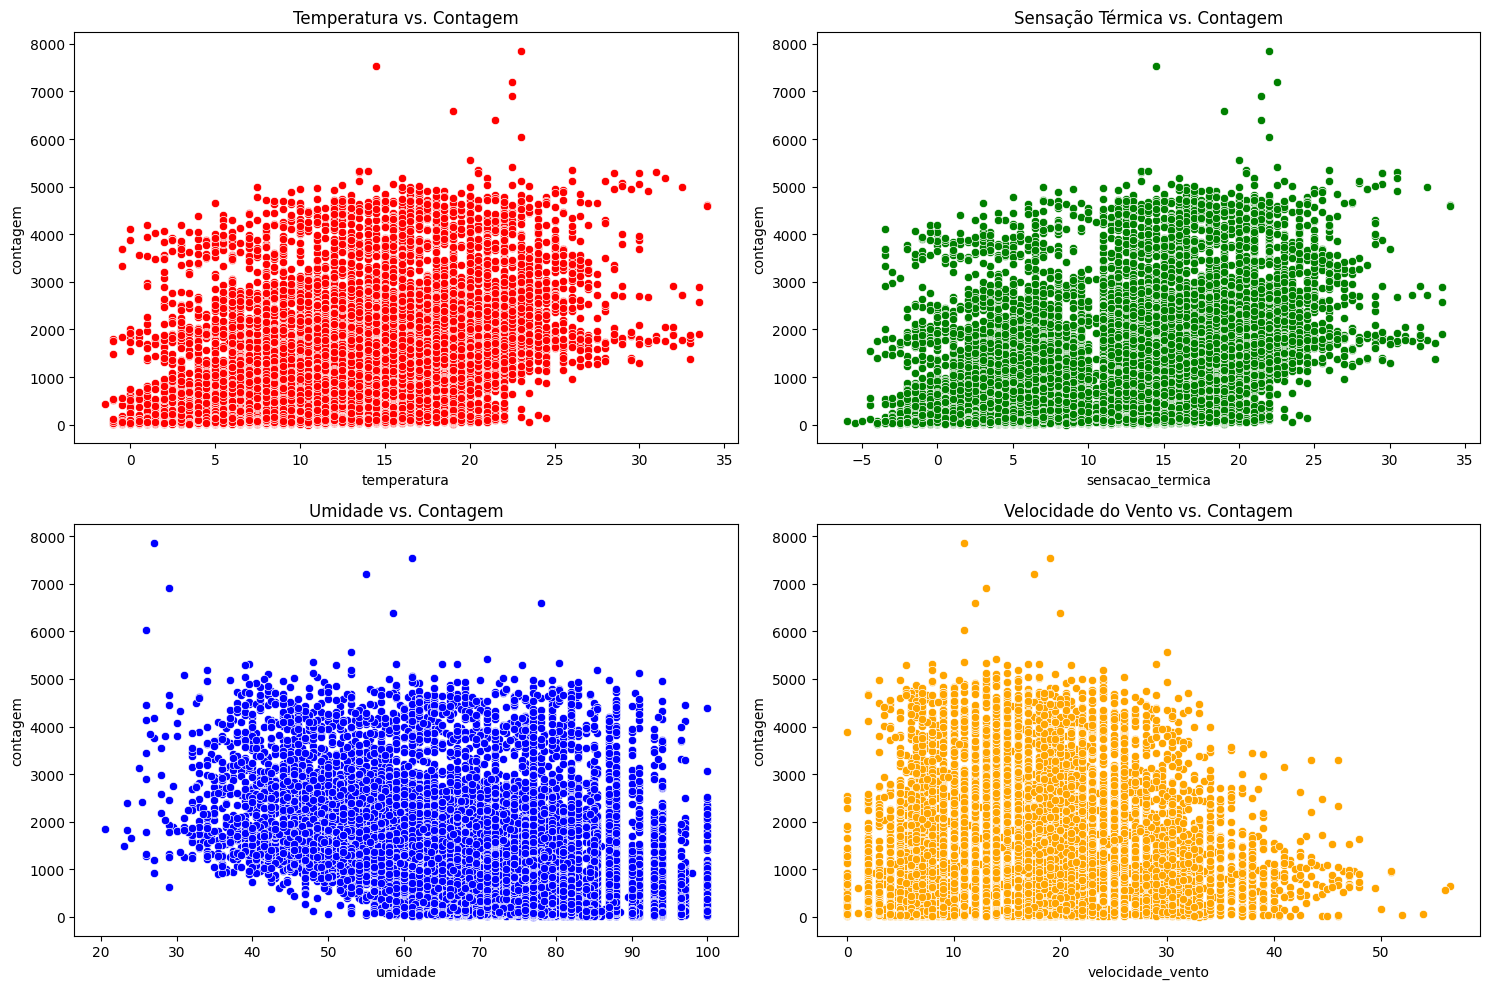

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Temperatura vs. Contagem
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem', color='red')
axes[0, 0].set_title('Temperatura vs. Contagem')

# Gráfico 2: Sensação Térmica vs. Contagem
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem', color='green')
axes[0, 1].set_title('Sensação Térmica vs. Contagem')

# Gráfico 3: Umidade vs. Contagem
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem', color='blue')
axes[1, 0].set_title('Umidade vs. Contagem')

# Gráfico 4: Velocidade do Vento vs. Contagem
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem', color='orange')
axes[1, 1].set_title('Velocidade do Vento vs. Contagem')

plt.tight_layout()
plt.show()

Segundo os gráficos de dispersão, a contagem que representa o aluguel das bicicletas diminui muito conforme a temperatura e a sensação térmica aumentam.

Já em relação a umidade a maioria dos alugueis se concentram entre 40 e 90% de umidade.

Em relação a velocidade do evnto, passa a diminuir a contagem a partir dos 35k/h.

Analisando as correlações entre variáveis através do mapa de calor

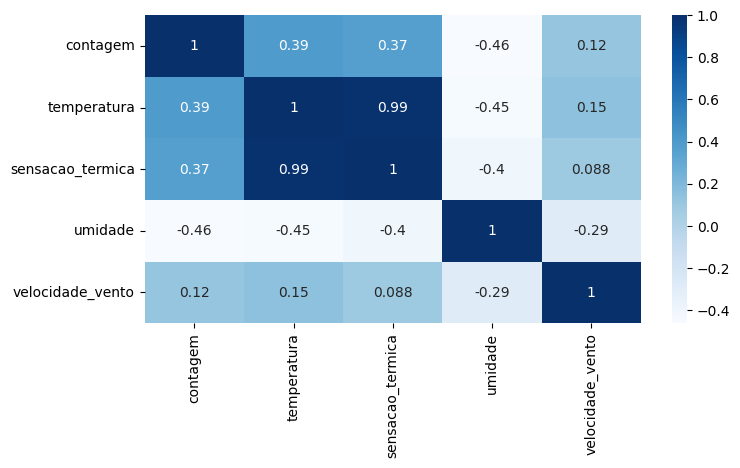

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

Explorando os dados categoricos

É interessante também olhar para os atributos das classes, ou seja, as características relacionadas de cada variável e entender a importância delas em relação aos alugueis.

Por isso irei explorar os valores únicos de cada coluna de clima

In [ ]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [ ]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(f'Coluna: {col}')
    print(df_limpo[col].unique())
    print('='*15,'\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



Comparando dias normais, feriados e fins de semana: Qual tem mais influência em relação aos alugueis de bicicletas?

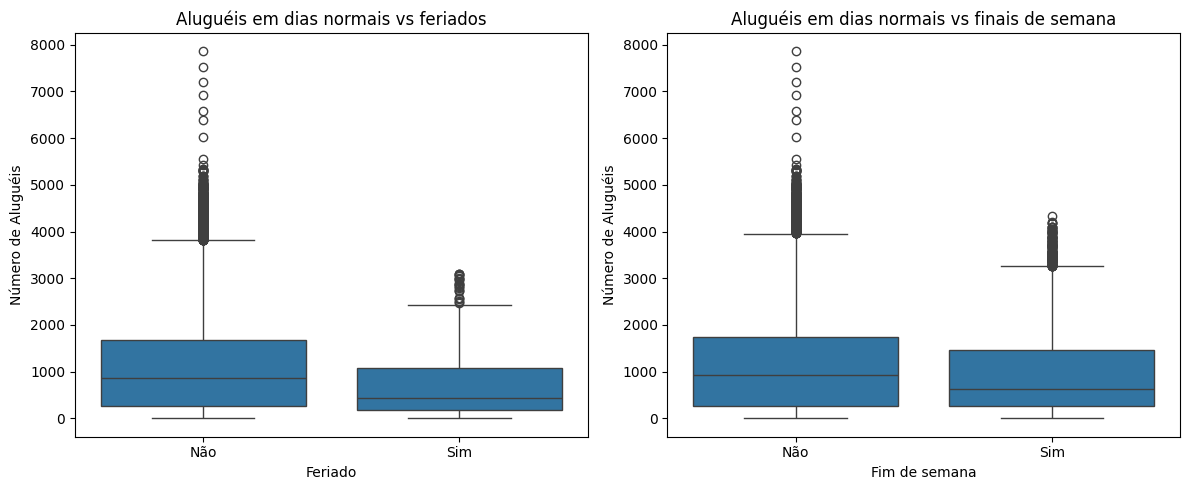

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='feriado', y='contagem', order=['Não', 'Sim'], data=df_limpo, ax=axes[0])
axes[0].set_title('Aluguéis em dias normais vs feriados')
axes[0].set_xlabel('Feriado')
axes[0].set_ylabel('Número de Aluguéis')

sns.boxplot(x='fim_de_semana', y='contagem', order=['Não', 'Sim'], data=df_limpo, ax=axes[1])
axes[1].set_title('Aluguéis em dias normais vs finais de semana')
axes[1].set_xlabel('Fim de semana')
axes[1].set_ylabel('Número de Aluguéis')

plt.tight_layout()
plt.show()


Os dois boxplots relacionados a finais de semana e feriados mostram que todos os números são maiores em relação aos alugueis durante a semana, mesmo as medianas, médias e outliers são maiores durante a semana.

In [ ]:
#Analisando as medianas
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [ ]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [ ]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


Em números absolutos é óbvio chegar a conclusão que haverá mais alugueis de bicicletas em dias úteis do que em finais de semana e feriados, porém proporcionalmente não daria ainda pra apontar que as pessoas preferem alugar na semana, devemos ter embasamento estatístico para chegar a essa conclusão

Investigando como o clima afeta a demanda**


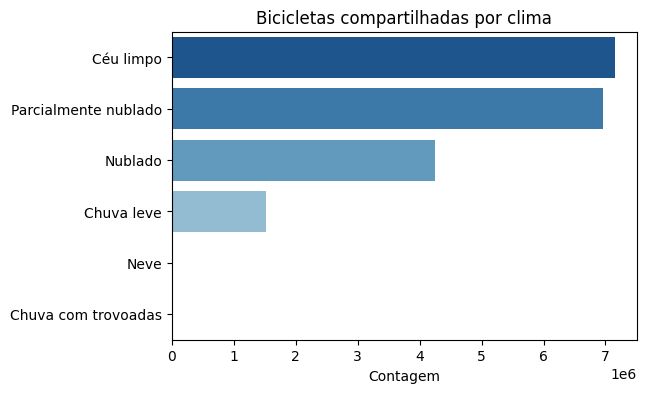

In [ ]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

In [ ]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


Analisando as distribuições por estação

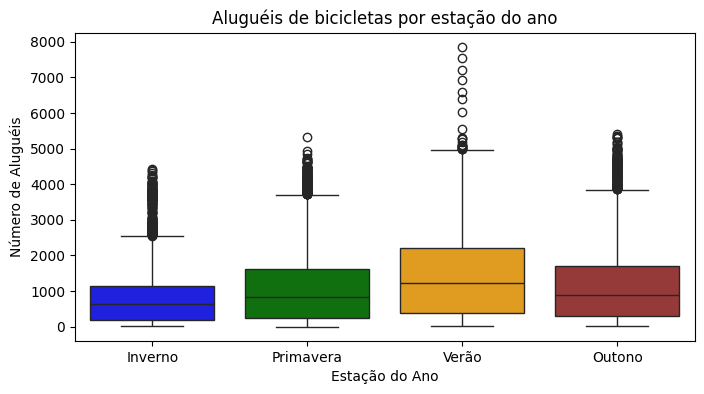

In [ ]:
plt.figure(figsize=(8, 4))
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

In [ ]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [ ]:
df_limpo.groupby('estacao')['contagem'].sum()

,contagem
estacao,
Inverno,3558087
Outono,5073040
Primavera,4850236
Verão,6424609


In [ ]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646296))

O teste de Mann Whitney é um teste não paramétrico, usado apenas para comparar distribuições independentes como é o caso. As vezes se faz necessário entender estatisticamente se há diferença relevante entre os dados ou amostras. Nesse caso comparando a mediana dos alugueis no Outono e na primavera já seria suficiente para entender a diferença entre os alugueis, mas o teste representando um P - Valor abaixo de 0,5 faz com que neguemos com veemencia a hipotese nula dos dois valores serem iguais. Lembrando que teste bilateral apresenta busca a diferença entre as hipóteses.

Analisando os dados ao longo do tempo

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
#Criando uma cópia para alterar o tipo da coluna data_hora
df_data = df_limpo.copy()

df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
#Conferindo se de fato a coluna passou a ser do tipo datetime
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


Fazendo algumas formatações na tabela para possibilitar diferentes analises temporais, como entender quais meses e horarios influenciam mais nos alugueis.

In [ ]:
# Criando novas colunas: mes e horario
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

# Retirando o horário da coluna data_hora
df_data['data_hora'] = df_data['data_hora'].dt.date

# Renomeando a coluna data_hora para data:
df_data = df_data.rename(columns={'data_hora': 'data'})

# Convertendo novamente a coluna data para o formato datetime pois ela voltou a ser Object:
df_data['data'] = pd.to_datetime(df_data['data'])

df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
#Isolando a coluna horario para entender o comportamento
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

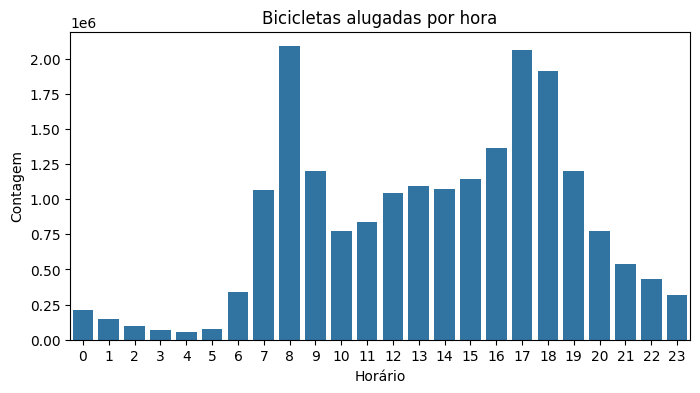

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')

plt.show()

É importante notar que os picos de aluguéis de bicicleta são às 8, 17 e 18horas, muito provavelmente por conta dos horários relacionados ao caminho de ida e volta do trabalho e faculdade.

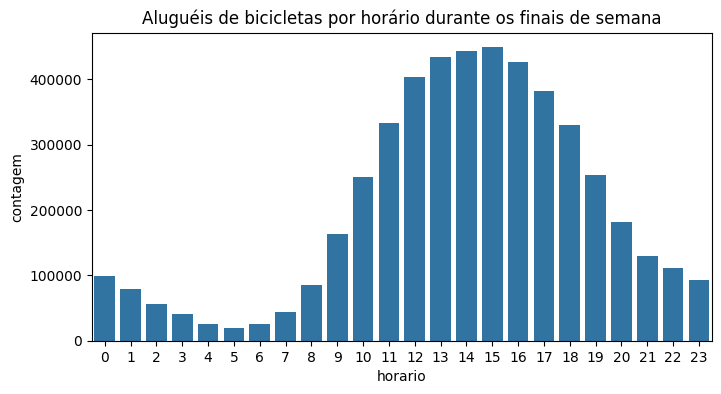

In [ ]:
#Isolando dados do fim de semana
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

#Somando os dados por horario apenas aos finais de semana
alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')
plt.show()

Os pico de alugueis durante o final de semana é entre às 12 e 17h, diferente dos dias de semana.

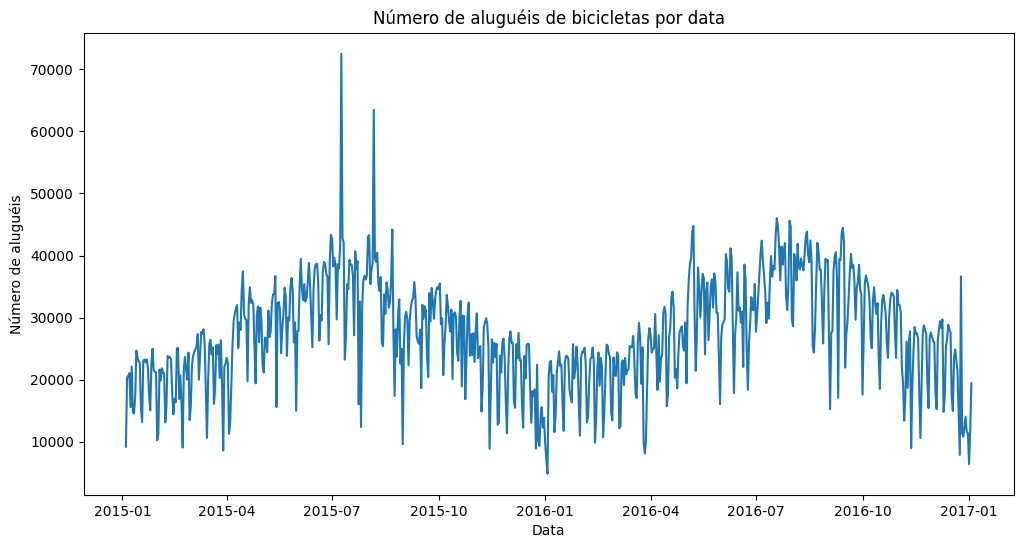

In [ ]:
#Analisando os dados por data (o proprio grafico definiu o trimestre como padrão de separação)
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

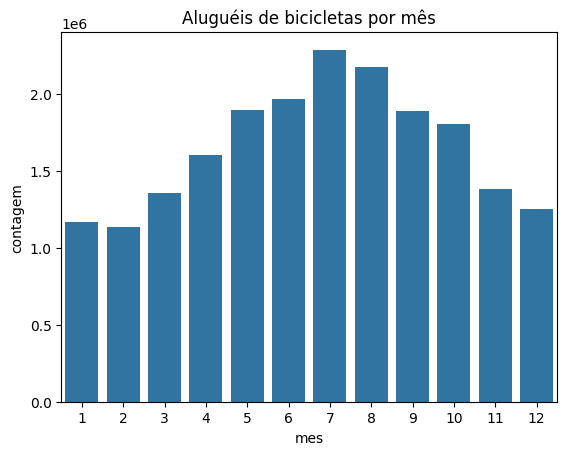

In [ ]:
#Isolando a soma de alugueis por mês

alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()
sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.show()

In [ ]:
#Criando uma coluna apenas com o mês(ciclo) apartada da data
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
df_tempo['mes'] = df_tempo['data'].dt.to_period('M')
df_tempo.head()

,data,contagem,mes
0,2015-01-04,9234,2015-01
1,2015-01-05,20372,2015-01
2,2015-01-06,20613,2015-01
3,2015-01-07,21064,2015-01
4,2015-01-08,15601,2015-01


In [ ]:
#Média mensal
media_aluguel_mes = df_tempo.groupby(['mes'])['contagem'].mean().reset_index()
media_aluguel_mes

,mes,contagem
0,2015-01,19522.821429
1,2015-02,19414.071429
2,2015-03,22449.483871
3,2015-04,27719.400000
4,2015-05,28884.290323
5,2015-06,34441.733333
6,2015-07,36151.193548
7,2015-08,33353.258065
8,2015-09,29749.266667
9,2015-10,27904.709677


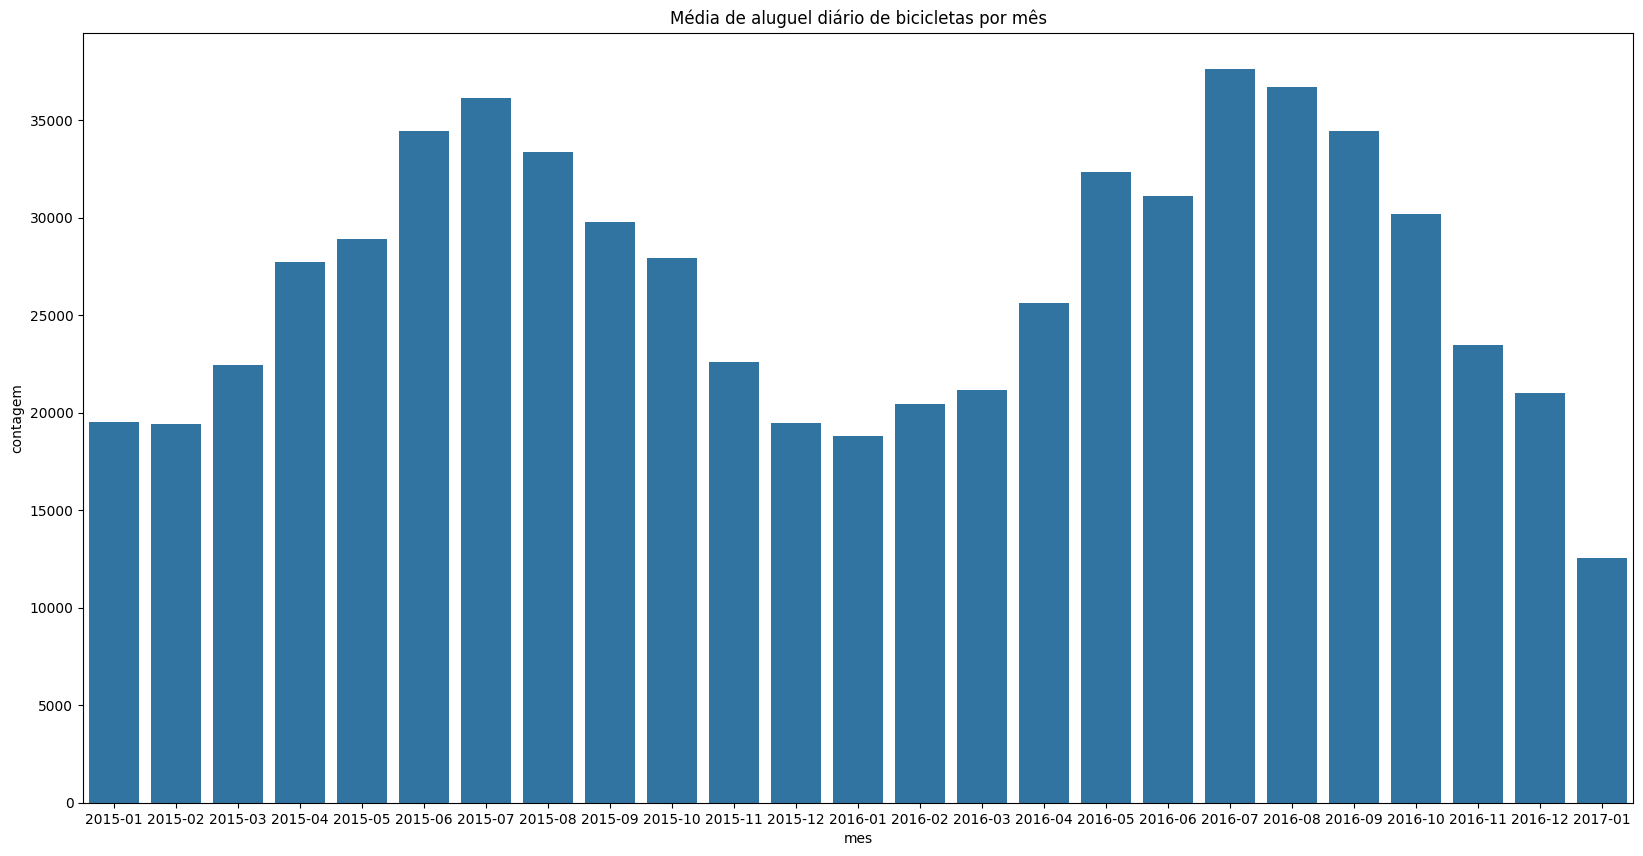

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x='mes', y='contagem', data=media_aluguel_mes)
plt.title('Média de aluguel diário de bicicletas por mês')
plt.show()

Os dados de alugueis das bicicletas foram coletados sobre o cenário real no Reino Unido. Quando analisamos o numero totais de aluguel, houve um pico entre os meses de Julho e Outubro de 2015 em razão de uma greve geral dos metrôs britânicos. Analisando o comportamento total mensal, os meses que representam as férias escolares possuem os maiores números de aluguel. A média mensal também corrobora esse pico entre Junho e Agosto.

# **Construindo o modelo preditivo**

In [ ]:
#Renomeando as colunas para adequar à previsão do prophet e agrupando os dados somados por data (ds:data, previsão; y)
from prophet import Prophet

df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet


,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
# Definindo um seed para garantir a reprodutibilidade e não deixar que os resultados mudem(Permitindo assim uma comparação)
import numpy as np
np.random.seed(4587)

# Instanciando o modelo Prophet
modelo = Prophet()

# Treinando o modelo com a ultimo Df separado
modelo.fit(df_prophet)

# Criando um dataframe para previsões futuras(90 dias)
futuro = modelo.make_future_dataframe(periods=90, freq='D')

#Realizando a previsão
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/byrvglkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/32zc84n1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79906', 'data', 'file=/tmp/tmp1skrhbk8/byrvglkq.json', 'init=/tmp/tmp1skrhbk8/32zc84n1.json', 'output', 'file=/tmp/tmp1skrhbk8/prophet_modelorn2yufz/prophet_model-20250917015548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:55:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:55:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Gráfico do modelo de previsão

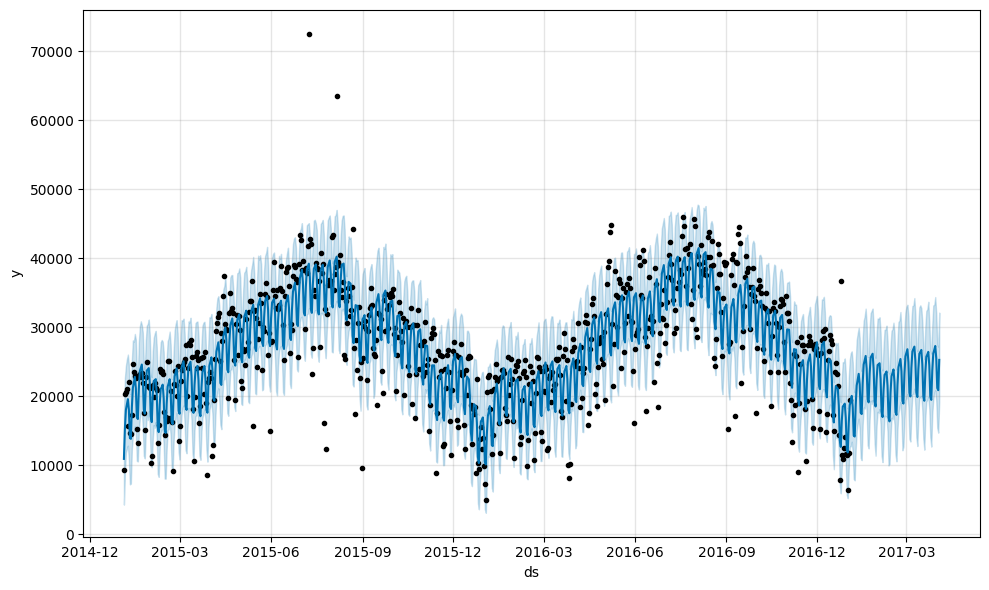

In [ ]:
fig1 = modelo.plot(previsao)

Criando um Dataframe que mostra no detalhe o modelo de previsão, como numero geral da previsão de alugueis por data e seu intervalo de confiança onde yhat_Lower representa o ponto mais baixo do intervalo da previsão e o yhat_upper o ponto mais alto.

In [ ]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


Abaixo verei os componentes por trás do modelo, a tendência e a sazonalidade que ele identificou no comportamento dos dados

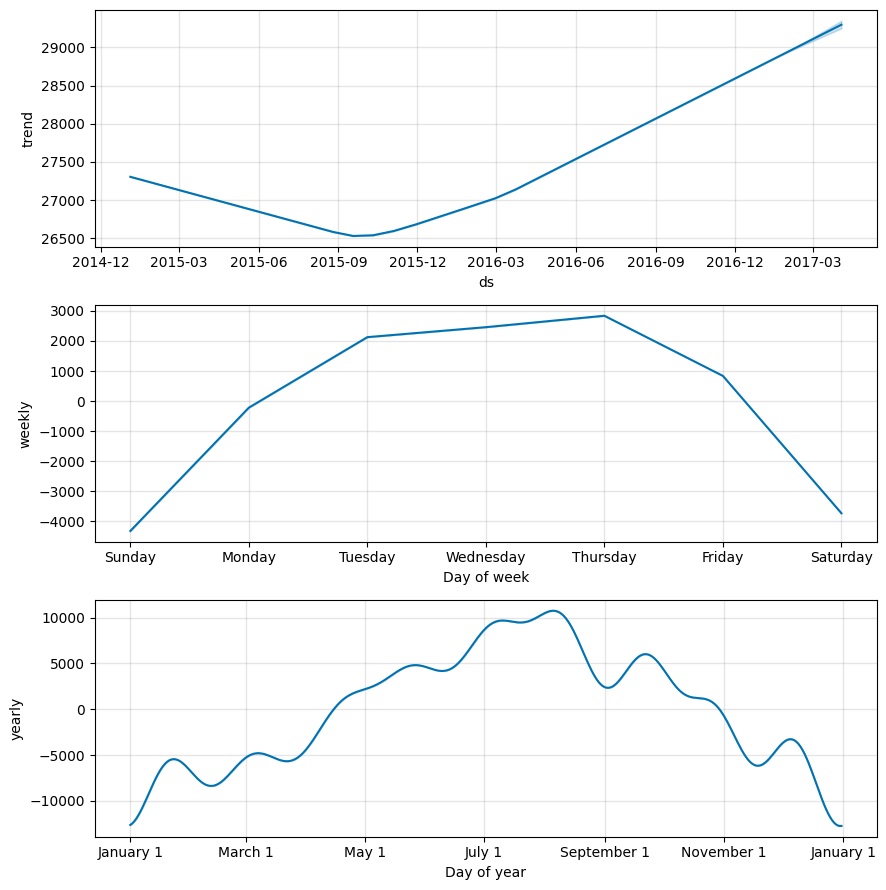

In [ ]:
fig2 = modelo.plot_components(previsao)

**Criação dos Dataframes de treino e teste**

In [ ]:
df_prophet.shape

(730, 2)

In [ ]:
df_treino = pd.DataFrame()

# Separando 80% dos dados para treino
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

In [ ]:
df_teste = pd.DataFrame()

# Separando 20% dos dados para teste
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [ ]:
#Treinando o modelo com os dados de treino
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/lt2i815_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/3564ql4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29244', 'data', 'file=/tmp/tmp1skrhbk8/lt2i815_.json', 'init=/tmp/tmp1skrhbk8/3564ql4a.json', 'output', 'file=/tmp/tmp1skrhbk8/prophet_modelushm_r16/prophet_model-20250917015550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:55:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:55:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


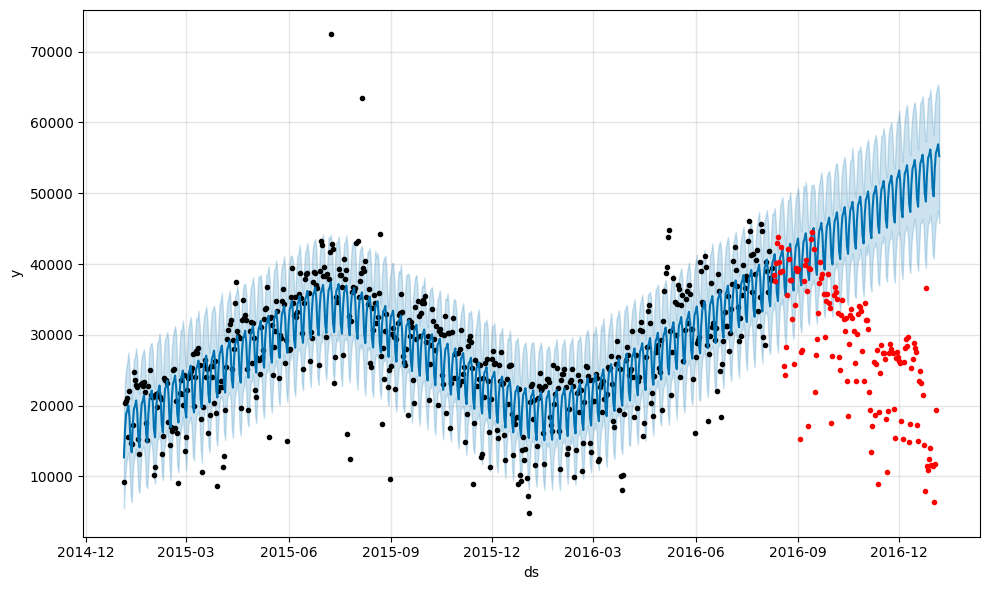

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

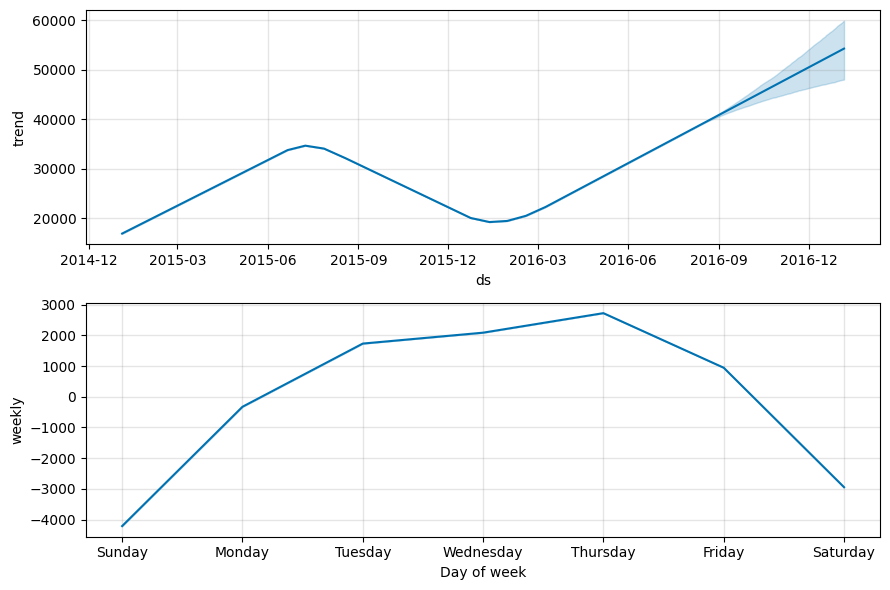

In [ ]:
fig2 = modelo.plot_components(previsao)

No grafico de regressão eu destaquei em vermelho os dados de teste para entender se o modelo de fato aprendeu, podemos notar que não, ele não segue o intervalo de confiança da previsão estabelecida pelos dados de treino. Os compontentes mostraram que o modelo também não levou em consideração a sazonalidade anual, ou seja, ele não entendeu os meses que há os picos de aluguel. é necessário fazer uns ajustes para melhorar a previsão

**Estabelenco uma métrica de avaliação para o modelo**

Agora, precisamos entender quão ruim está a performance do modelo. Para isso, utilizaremos uma métrica apropriada.

Quando trabalhamos com regressão linear, costumamos usar a métrica R² para avaliar a performance do modelo. Essa métrica é adequada para relações lineares.

No entanto, em séries temporais, não temos uma relação linear simples, já que os valores podem subir e descer devido a vários fatores, como sazonalidade. Portanto, a métrica R² não é a melhor escolha aqui.

A ideia é usar uma métrica adequada para séries temporais, que compare os valores previstos com os valores reais e forneça uma estimativa de quão precisas são as previsões. Queremos saber se estamos errando, em média, tantas bicicletas para cima ou para baixo.

In [ ]:
#Criando um df com merge pra entender a diferença entre os dados de treino e teste para as mesmas datas(yhat é o previsto)
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


Quantificação dos erros

Fórmula do Erro Quadrático Médio (MSE)

Para quantificar esses erros, precisamos de uma métrica que compare os valores reais (y) com os valores previstos (yhat) e calcule uma média do erro. Uma métrica adequada para isso é o Erro Quadrático Médio (MSE), que nos dá uma noção clara de quanto o modelo está errando em média.

Essa métrica pega a diferença entre os valores reais (y) e previstos (yhat), subtraindo-os. Em seguida, eleva essa diferença ao quadrado, soma todos esses valores e depois divide pelo número de observações (n), que é o número de linhas do nosso DataFrame (146). Isso penaliza erros maiores devido à elevação ao quadrado.



**Cálculo do RMSE**

Para obter um valor mais compreensível, tiramos a raiz quadrada do MSE, resultando na métrica Raiz do Erro Quadrático Médio (RMSE).

Vamos calcular essas métricas usando a biblioteca SKLearn. Primeiro, importamos a função mean_squared_error.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:466132050.6184666, RMSE:21590.09149166503


O RMSE aponta que meu modelo preditivo está errando em 21mil590 alugueis para mais ou para menos.

**Melhorando as previsões**

In [ ]:
#Acrescentando a sazonalidade anual ao modelo e estabelecendo previsão para 150 dias
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/kmg6oart.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/e7jg3y26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35469', 'data', 'file=/tmp/tmp1skrhbk8/kmg6oart.json', 'init=/tmp/tmp1skrhbk8/e7jg3y26.json', 'output', 'file=/tmp/tmp1skrhbk8/prophet_model2wnvkcdw/prophet_model-20250917015552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:55:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:55:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


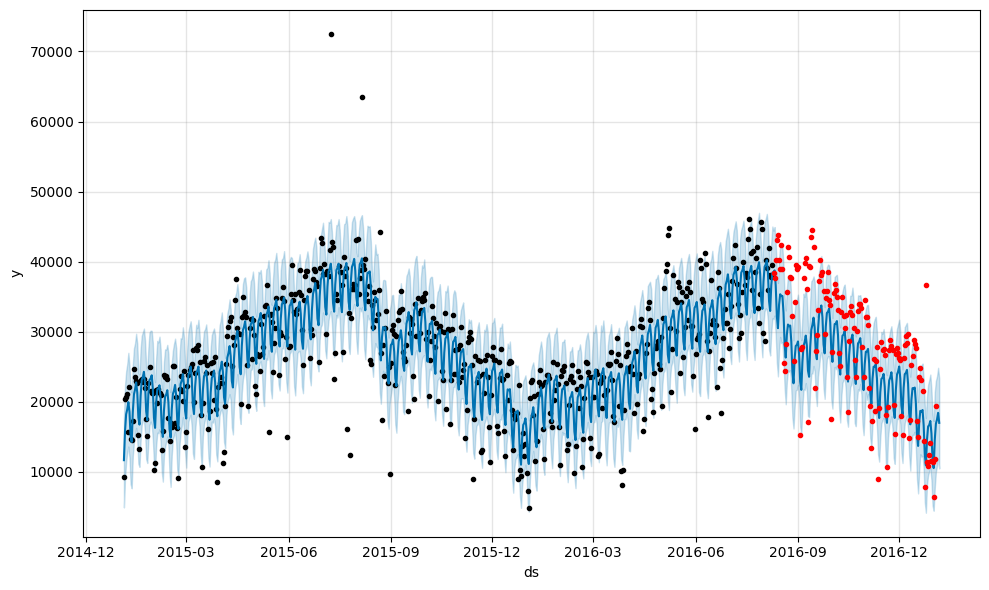

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Ter Acrescentado a sazonalidade anual já ajustou bastante os dados do intervalo previsto e o realizado

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38623883.499975376, RMSE:6214.8116222437


Agora temos um erro total de 6.214 entre previsão e realizado, antes o modelo apresentou um erro de 21.000

**Removendo Outliers**

Uma forma de ajustar ainda mais  o modelo de previsão de séries temporais é removendo os Outliers. No caso do conjunto de dados em específico, podemos lembrar que há um comportamento bem discrepante no pico dos alugueis de bicicleta, que foram aquele meses em que houve greves no transporte público. Esse cenário é de fato uma anomalia que não pode ser considerada sazonalidade e irá distorcer a previsão.

In [ ]:
df_prophet.head()

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/ptzpjbmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/s0gzy3s5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13406', 'data', 'file=/tmp/tmp1skrhbk8/ptzpjbmu.json', 'init=/tmp/tmp1skrhbk8/s0gzy3s5.json', 'output', 'file=/tmp/tmp1skrhbk8/prophet_modelf7bhzddo/prophet_model-20250917015552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:55:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Removendo os outliers estabelecendo o realizado dentro do minimo e maximo intervalo de confiança
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [ ]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


Agora há 631 linhas para dados sem outliers, ou seja, irei mudar os numeros para separar os dados de treino e teste(80,20)

In [ ]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [ ]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers ['y'][505:]

Treinando com os dados de outliers tratados

In [ ]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/88lrsns_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1skrhbk8/az02o001.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19200', 'data', 'file=/tmp/tmp1skrhbk8/88lrsns_.json', 'init=/tmp/tmp1skrhbk8/az02o001.json', 'output', 'file=/tmp/tmp1skrhbk8/prophet_modeliojt33pt/prophet_model-20250917015553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


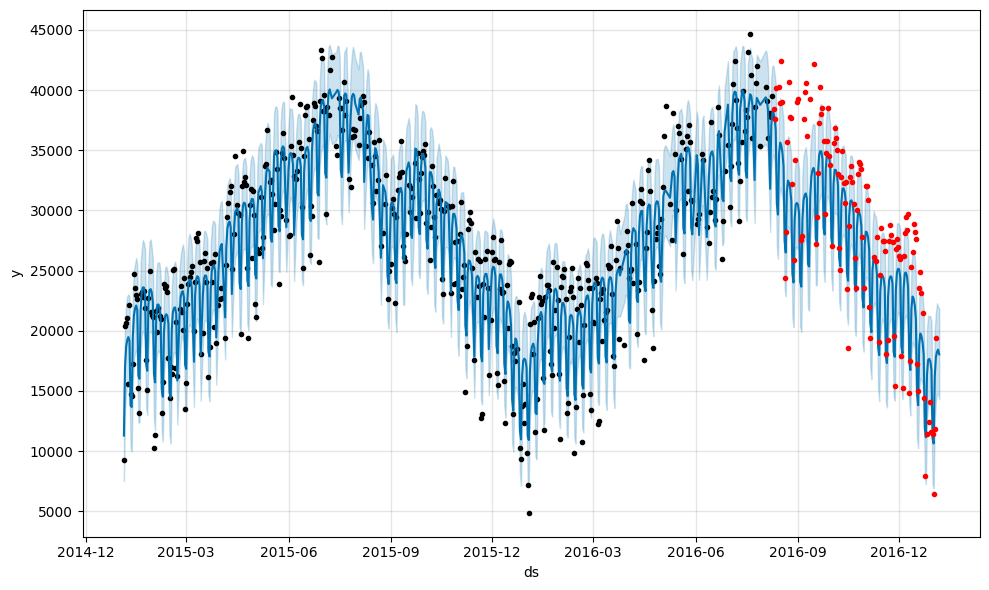

In [ ]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [ ]:
# 📊 RMSE (Root Mean Squared Error) - Raiz do Erro Quadrático Médio
# Mostra o erro médio em relação aos valores reais, punindo mais os grandes erros (outliers)
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')   # MSE = erro quadrático médio (difícil de interpretar na prática)
print(f'RMSE: {rmse:.2f}') # RMSE = erro médio na mesma escala da variável (ex.: nº de bicicletas)


MSE: 15672925.76
RMSE: 3958.90


Agora diminuimos o erro ainda mais, para 3.958

Adicionando as métricas de MAE, MAPE E R2 SCORE AO MODELO FINAL

In [ ]:
# Calculando R2 score
from sklearn.metrics import r2_score

r2 = r2_score(df_comparacao['y'], df_comparacao['yhat'])
print(f'R² Score: {r2:.2%} é o percentual do Quanto da variação dos dados o modelo consegue explicar')


R² Score: 76.18% é o percentual do Quanto da variação dos dados o modelo consegue explicar


O modelo consegue entender 76% de toda a varição dos dados(Variância, sazonalidades etc)

In [ ]:
# MAE (Mean Absolute Error) - Erro Médio Absoluto
# Mostra, em média, quantas unidades o modelo erra (ex.: bicicletas por dia)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_comparacao['y'], df_comparacao['yhat'])
print(f'MAE: {mae:.2f} é o erro médio diário')  # Mantém a unidade original dos dados

MAE: 3275.84 é o erro médio diário


In [ ]:
# MAPE (Mean Absolute Percentage Error) - Erro Percentual Absoluto Médio
# Mostra, em média, o erro em percentual em relação ao valor real
import numpy as np

mape = np.mean(np.abs((df_comparacao['y'] - df_comparacao['yhat']) / df_comparacao['y'])) * 100
print(f'MAPE: {mape:.2f}%')


MAPE: 12.60%


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
fig = plot_plotly(modelo_sem_outliers, previsao)

# Adiciona os pontos do teste em vermelho
fig.add_scatter(
    x=df_teste['ds'],
    y=df_teste['y'],
    mode='markers',
    marker=dict(color='red'),
    name='Real Data'
)

# Mostrar no notebook
fig.show()

# Salvar como HTML interativo
fig.write_html("previsao_bicicletas.html")


Por ultimo plotei uma regressão com Plotly, fazendo com que o grafico fique interativo